# Import Libraries

In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm  import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression , RidgeCV , LassoCV , MultiTaskLassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import time
import pickle
import tensorflow as tf 
import keras 
from keras.layers import Dense 
from keras.models  import Sequential

In [ ]:
X_faces,target = fetch_olivetti_faces(return_X_y =  True) 

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
X_faces = X_faces.reshape((400, 4096))
X_faces

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [ ]:
target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

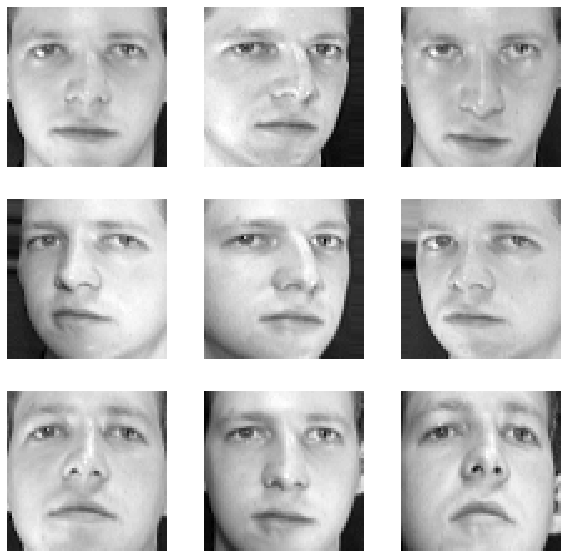

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(9):
  face = (train[i])
  fig.add_subplot(3, 3, i+1)
  plt.axis("off")
  plt.imshow(
            face.reshape((64,64)),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )



In [ ]:
train = X_faces[target <= 35 ]
test  = X_faces[target > 35 ]

In [ ]:
n_pix =  X_faces.shape[1]
## Define the  upper part of face as data and the lower side is the target 

X_train =  train[:,:(n_pix +1 )//2]
X_test =  test[:,:(n_pix +1 )//2]
y_train = train[:,(n_pix)//2 :] 
y_test = test[:,(n_pix)//2 :] 

# Machine Learning Algorithm

In [ ]:
estimator = {
    'KNN':KNeighborsRegressor(),
    'LinearRegression':LinearRegression(),
    'RandomForest':RandomForestRegressor(n_estimators=10),
    'RidgeCV' :RidgeCV(),
    'DecisionTreeRegressor':DecisionTreeRegressor(random_state=0)    }

In [ ]:
Result = {}
for i in estimator :
  algorithm =  estimator[i]
  start =  time.time()
  algorithm.fit(X_train,y_train)
  algo_time = time.time() - start
  y_test_predicted = algorithm.predict(X_test)
  Result[i] = y_test_predicted
  error = mean_squared_error(y_test,y_test_predicted)
  pickle.dump(algorithm, open(str(i+'.sav'), 'wb'))
  print('the predict error of regressor' , i , 'is : ' , error ,'and the trainig time is : ' ,algo_time)



the predict error of regressor KNN is :  0.02040321 and the trainig time is :  0.0026786327362060547
the predict error of regressor LinearRegression is :  0.027219782 and the trainig time is :  0.8037004470825195
the predict error of regressor RandomForest is :  0.016441966310374444 and the trainig time is :  133.8811433315277
the predict error of regressor RidgeCV is :  0.013707404214521313 and the trainig time is :  0.3166975975036621
the predict error of regressor DecisionTreeRegressor is :  0.033880473868377114 and the trainig time is :  22.200359106063843


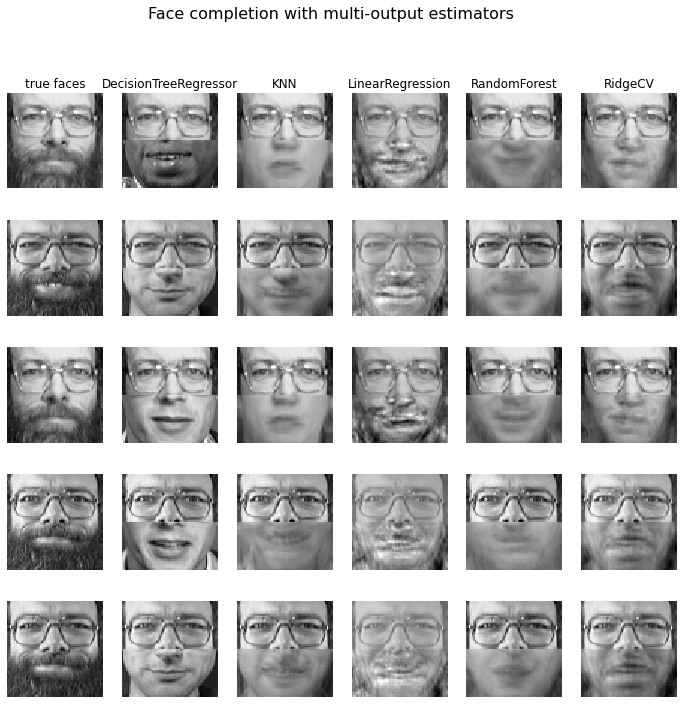

In [ ]:
image_shape = (64, 64)

n_cols = 1 + len(estimator)
plt.figure(figsize=(2.0 * n_cols, 2.26 *5))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(5):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(5, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(5, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(estimator)):
        completed_face = np.hstack((X_test[i], Result[est][i]))

        if i:
            sub = plt.subplot(5, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(5, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

# Deep Learning Algorithm

In [143]:
model = Sequential()
model.add(Dense(256, activation= 'relu'))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(2048))

In [144]:
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [145]:
from sklearn import metrics
history = model.fit(X_train,y_train , epochs=20 ,  validation_split =0.1)

Epoch 1/20
11/11 [==============================] - 1s 22ms/step - loss: 0.2382 - val_loss: 0.1096
Epoch 2/20
11/11 [==============================] - 0s 7ms/step - loss: 0.0710 - val_loss: 0.0333
Epoch 3/20
11/11 [==============================] - 0s 6ms/step - loss: 0.0277 - val_loss: 0.0306
Epoch 4/20
11/11 [==============================] - 0s 7ms/step - loss: 0.0223 - val_loss: 0.0233
Epoch 5/20
11/11 [==============================] - 0s 7ms/step - loss: 0.0196 - val_loss: 0.0234
Epoch 6/20
11/11 [==============================] - 0s 7ms/step - loss: 0.0192 - val_loss: 0.0245
Epoch 7/20
11/11 [==============================] - 0s 7ms/step - loss: 0.0187 - val_loss: 0.0226
Epoch 8/20
11/11 [==============================] - 0s 8ms/step - loss: 0.0185 - val_loss: 0.0231
Epoch 9/20
11/11 [==============================] - 0s 7ms/step - loss: 0.0182 - val_loss: 0.0220
Epoch 10/20
11/11 [==============================] - 0s 6ms/step - loss: 0.0176 - val_loss: 0.0225
Epoch 11/20
11/11 

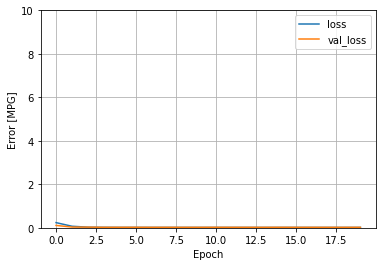

In [146]:
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [147]:
y_test_predicted =  model.predict(X_test)

In [148]:
mean_squared_error(y_test_predicted,y_test)

0.0141360145

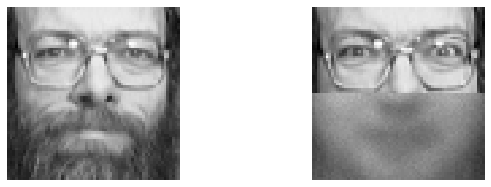

In [152]:
fig = plt.figure(figsize = (10,7))
face =  test[0]
fig.add_subplot(2,2,1)
plt.axis("off")
plt.imshow(
            face.reshape((64,64)),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )
fig.add_subplot(2,2,2)
plt.axis("off")
face2 = y_test_predicted[8]
face2 =  np.hstack((X_test[8],face2))
plt.imshow(
            face2.reshape((64,64)),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()